# Project for statstics where the assignment is to explore a dataset and use some of the tools we been working on. This is very basic

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as scs 
import pandas as pd
import math


iris_file = '/Users/joeloscarsson/Documents/www/Statistics/Data/iris.csv'

df = pd.read_csv(iris_file)
df = df.dropna() #Drop all non NaN

# Initial information
df.info()
df.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sepal_length   150 non-null    float64
 1    sepal_width   150 non-null    float64
 2    petal_length  150 non-null    float64
 3    petal_width   150 non-null    float64
 4    class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa


In [19]:
# Ändrar namn på kolumnerna så de är mer lättförstådda
df.columns = df_list_names = [
    "bägarbladslängd",
    "bägarbladsbredd",
    "kronbladslängd",
    "kronbladsbredd",
    "Blomtyp",
]

df.head()

# Undersöker standardavvikelsen för samtliga bredder/längder av samtliga blad
# Undersöker medianen för samtliga bredder/längder av samtliga blad

df.std(numeric_only=True),


(bägarbladslängd    0.828066
 bägarbladsbredd    0.433594
 kronbladslängd      1.764420
 kronbladsbredd      0.763161
 dtype: float64,)

# Deskriptiva mått
Här visar jag deskriptiva mått med och utan plottar för medelvärde, standardavvikelsen, median, typvärde.

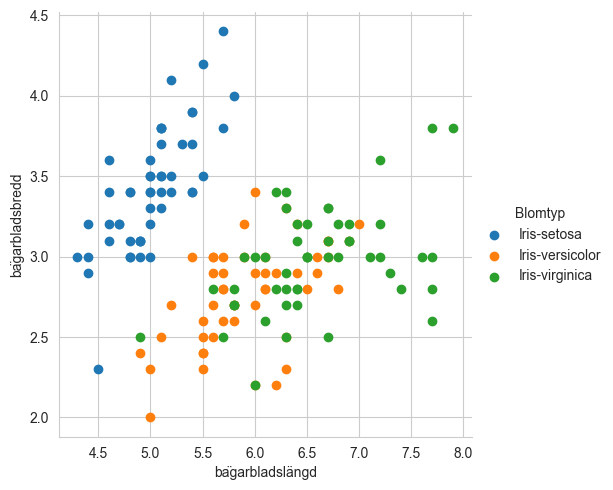

In [20]:
# Initialt visuell information om vår datamängd bredd/längd för bägarblad. Samt lite vilka blommor vi har.
# Använder detta för att snabbt få koll på vad vi har att jobba med

sns.set_style("whitegrid")
sns.FacetGrid(df, hue="Blomtyp", height=5).map(
    plt.scatter, "bägarbladslängd", "bägarbladsbredd"
).add_legend()
plt.show()


## Typvärde
- Vilket värde förekommer flest gånger för bägarbladsbredd datasetet?
- Vilken blomma förekommer flest gånger i hela datasetet?

In [21]:
df['bägarbladsbredd'].value_counts()  # Värdet 3.0 för bägarbladsbredd förekommer 26 gånger i datasetet.

3.0    26
2.8    14
3.2    13
3.1    12
3.4    12
2.9    10
2.7     9
2.5     8
3.5     6
3.3     6
3.8     6
2.6     5
2.3     4
3.7     3
2.4     3
2.2     3
3.6     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: bägarbladsbredd, dtype: int64

In [22]:
df['Blomtyp'].value_counts()  # Alla blommor förekommer lika ofta

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Blomtyp, dtype: int64

# Medelvärde och standardavvikelse för samtliga breddar/längder för alla blomtyper

Medelvärde beräknas med:
### ${\bar x}=\frac{1}{n}\sum_{i=1}^{n}x_i=\frac{x_1+\dots+x_n}{n}$

Standardavvikelse med:
### $s=\sqrt{s^2}$

In [23]:
df.head()

,bägarbladslängd,bägarbladsbredd,kronbladslängd,kronbladsbredd,Blomtyp
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
medelvärde_flängd = df[df["Blomtyp"] == "Iris-setosa"]["bägarbladslängd"].mean().round(2)
medelvärde_fbredd = df[df["Blomtyp"] == "Iris-setosa"]["bägarbladsbredd"].mean().round(2)
medelvärde_klängd = df[df["Blomtyp"] == "Iris-setosa"]["kronbladslängd"].mean().round(2)
medelvärde_kbredd = df[df["Blomtyp"] == "Iris-setosa"]["kronbladsbredd"].mean().round(2)

stdflängd = df[df["Blomtyp"] == "Iris-setosa"]["bägarbladslängd"].std().round(2)
stdfbredd = df[df["Blomtyp"] == "Iris-setosa"]["bägarbladsbredd"].std().round(2)
stdklängd = df[df["Blomtyp"] == "Iris-setosa"]["kronbladslängd"].std().round(2)
stdkbredd = df[df["Blomtyp"] == "Iris-setosa"]["kronbladsbredd"].std().round(2)
###
###
medelvärde_flängd1 = df[df["Blomtyp"] == "Iris-virginica"]["bägarbladslängd"].mean().round(2)
medelvärde_fbredd1 = df[df["Blomtyp"] == "Iris-virginica"]["bägarbladsbredd"].mean().round(2)
medelvärde_klängd1 = df[df["Blomtyp"] == "Iris-virginica"]["kronbladslängd"].mean().round(2)
medelvärde_kbredd1 = df[df["Blomtyp"] == "Iris-virginica"]["kronbladsbredd"].mean().round(2)

stdflängd1 = df[df["Blomtyp"] == "Iris-virginica"]["bägarbladslängd"].std().round(2)
stdfbredd1 = df[df["Blomtyp"] == "Iris-virginica"]["bägarbladsbredd"].std().round(2)
stdklängd1 = df[df["Blomtyp"] == "Iris-virginica"]["kronbladslängd"].std().round(2)
stdkbredd1 = df[df["Blomtyp"] == "Iris-virginica"]["kronbladsbredd"].std().round(2)
###
###
medelvärde_flängd2 = df[df["Blomtyp"] == "Iris-versicolor"]["bägarbladslängd"].mean().round(2)
medelvärde_fbredd2 = df[df["Blomtyp"] == "Iris-versicolor"]["bägarbladsbredd"].mean().round(2)
medelvärde_klängd2 = df[df["Blomtyp"] == "Iris-versicolor"]["kronbladslängd"].mean().round(2)
medelvärde_kbredd2 = df[df["Blomtyp"] == "Iris-versicolor"]["kronbladsbredd"].mean().round(2)

stdflängd2 = df[df["Blomtyp"] == "Iris-versicolor"]["bägarbladslängd"].std().round(2)
stdfbredd2 = df[df["Blomtyp"] == "Iris-versicolor"]["bägarbladsbredd"].std().round(2)
stdklängd2 = df[df["Blomtyp"] == "Iris-versicolor"]["kronbladslängd"].std().round(2)
stdkbredd2 = df[df["Blomtyp"] == "Iris-versicolor"]["kronbladsbredd"].std().round(2)


print(f"My för Iris-Setosa bägarbladslängd är {medelvärde_flängd} och std är {stdflängd}")
print(f"My för Iris-Setosa bägarbladsbredd är {medelvärde_fbredd} och std är {stdfbredd}")
print(f"My för Iris-Setosa kronbladslängd är {medelvärde_klängd} och std är {stdklängd}")
print(f"My för Iris-Setosa kronbladsbredd är {medelvärde_kbredd} och std är {stdkbredd}")
###
print(f"My för Iris-virginica bägarbladslängd är {medelvärde_flängd1} och std är {stdklängd1}")
print(f"My för Iris-virginica bägarbladsbredd är {medelvärde_fbredd1} och std är {stdfbredd1}")
print(f"My för Iris-virginica kronbladslängd är {medelvärde_klängd1} och std är {stdklängd1}")
print(f"My för Iris-virginica kronbladsbredd är {medelvärde_kbredd1} och std är {stdkbredd1}")
##
print(f"My för Iris-versicolor bägarbladslängd är {medelvärde_flängd2} och std är {stdflängd2}")
print(f"My för Iris-versicolor bägarbladsbredd är {medelvärde_fbredd2} och std är {stdfbredd2}")
print(f"My för Iris-versicolor kronbladslängd är {medelvärde_klängd2} och std är {stdklängd2}")
print(f"My för Iris-versicolor kronbladsbredd är {medelvärde_kbredd2} och std är {stdkbredd2}")

My för Iris-Setosa bägarbladslängd är 5.01 och std är 0.35
My för Iris-Setosa bägarbladsbredd är 3.42 och std är 0.38
My för Iris-Setosa kronbladslängd är 1.46 och std är 0.17
My för Iris-Setosa kronbladsbredd är 0.24 och std är 0.11
My för Iris-virginica bägarbladslängd är 6.59 och std är 0.55
My för Iris-virginica bägarbladsbredd är 2.97 och std är 0.32
My för Iris-virginica kronbladslängd är 5.55 och std är 0.55
My för Iris-virginica kronbladsbredd är 2.03 och std är 0.27
My för Iris-versicolor bägarbladslängd är 5.94 och std är 0.52
My för Iris-versicolor bägarbladsbredd är 2.77 och std är 0.31
My för Iris-versicolor kronbladslängd är 4.26 och std är 0.47
My för Iris-versicolor kronbladsbredd är 1.33 och std är 0.2


# Normalfördelning av en specifik blomma med medelvärde och median

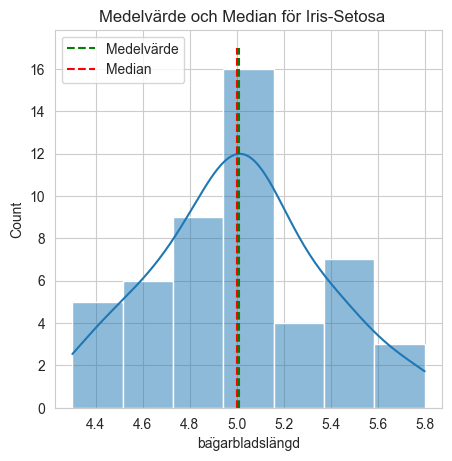

In [25]:
# Indexar en viss blomma
from scipy.stats import norm

df_setosa = df[df['Blomtyp'] == 'Iris-setosa'].reset_index(drop=True)
fig, ax = plt.subplots(figsize=(5, 2))

fig.suptitle('Medelvärde och Median för Iris-Setosa', y=2.1)
fig.subplots_adjust(top=2)
sns.histplot(df_setosa, x="bägarbladslängd", bins=7, kde=True, stat="count", discrete=False)

median_flängd = df[df["Blomtyp"] == "Iris-setosa"]["bägarbladslängd"].median().round(2)

plt.plot(
    [medelvärde_flängd, medelvärde_flängd],
    [0, 17],
    color="green",
    linestyle="dashed",
    linewidth=1.5,
    label="Medelvärde",
);

plt.plot(
    [median_flängd, median_flängd],
    [0, 17],
    color="red",
    linestyle="dashed",
    linewidth=1.5,
    label="Median",
);
leg = plt.legend(loc='upper left') # Rita legend för medelvärde och median i övre högra hörnet
plt.show()

# Konfidensintervall

Här konstruerar jag med ett 95% konfidensintervall medellängden för bägarbladsbredd för blomtypen "Iris-setosa".
- Vi har okänd $\sigma$.
- Så vi kommer använda oss utav t-statistiska. Formel beräknas:

## ${\bar x}\pm t_{\alpha/2}\frac{s}{\sqrt{n}}$


Med hjälp av Scipy så beräknar vi Konfidensintervallet på den datamängd jag var intresserad av att undersöka. "Iris-setosa".

Så med hjälp från t-fördelningspaketet från Scipy.
Så jag importerar t-fördelningspaketet från Scipy. Jag tar den delmängd från vår datamängd som jag är intresserad på att undersöka: "Iris-setosa".

In [26]:
from scipy.stats import t # Importera t-fördelningspaketet

# Väljer ut blomtypen från datamängden.
iris_s = df[df["Blomtyp"] == "Iris-setosa"] #["Foderbladsbredd"]

Konfidensintervallet: med (α=0.05) för medelbredden Kronblad för blomtypen "Iris-setosa" är: 0.214-0.274


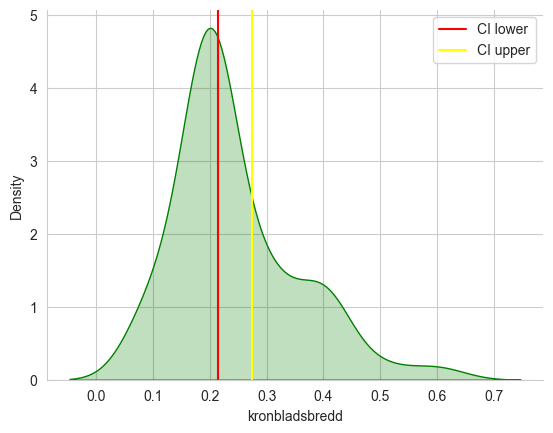

In [27]:
# Beräkna medelvärde för stickprovet
medelvärde_stickprov = np.mean(iris_s['kronbladsbredd'])
# Beräkna standardavvikelse från stickprovet 
standardavvikelse_sprov = np.std(iris_s['kronbladsbredd'], ddof=1)
# Beräknar n för stickprovet
n = len(iris_s['kronbladsbredd'])
# Beräknar medelfel. (Standard error)
sem = scs.sem(iris_s['kronbladsbredd'])
# Sätter signifikansgrad. Vi hade valt ett 95% konfidentsintervall
alpha = 0.05

# Beräknar confidence intervallet via Scipy
lower, upper = t.interval(confidence=1-alpha, df=n-1, loc=medelvärde_stickprov, scale=sem)

print(f'Konfidensintervallet: med (\u03B1=0.05) för medelbredden Kronblad för blomtypen "Iris-setosa\" är: {round(lower,3)}-{round(upper,3)}')

# Visualiserar konfidensintervallet
sns.kdeplot(iris_s['kronbladsbredd'], color='green', fill=True)
sns.despine()

plt.axvline(lower, color='red', label='CI lower')
plt.axvline(upper, color='yellow', label='CI upper')
plt.legend()
plt.show()

# En frågeställning jag vill spana på under detta datasetet är.

- Skiljer sig bägarbladsbredden mellan de olika blomtyperna avsevärt?
- Det jag undersöker är då om sepal width (bägarbladsbredd) för iris-setosa skiljer sig från bredden för bägarbladd för samtliga blomtyper.

In [28]:
# Här räknar jag ut medelvärdet för alla bägarbladsbredd för alla olika blomtyper

# sedan stickprov på den specifika sub kategorin
# Avrundar till 3 decimaler

totala_bägarbladsmy = df["bägarbladsbredd"].mean().round(3)
print(f"Det totala medelvärdet av bägarbladsbredd för populationen är {totala_bägarbladsmy}")

Det totala medelvärdet av bägarbladsbredd för populationen är 3.054


# Vi skattar populationsmedelvärdet utifrån medelvärdet på samtliga blommor:

### $\mu_0$ = 3.054 cm).
Med en signifikansnivå på:
### $\alpha = 0.05$. 

In [29]:
# Eftersom standardavvikelsen är okänd så kommer vi använda oss utav t-fördelningen

from scipy.stats import t # Importera t-fördelningen

# Vi börjar med att bestämma alternativhypotesen som:<br>
   $H_A: \mu = 3.054\,cm$
# Och sedan nollhypotesen som dess komplement:<br>
   $H_0: \mu \neq 3.054\,cm$<br>

Efter det, beräknar vi teststatistikan för vår nollhypotes, d.v.s:


# $t = \frac{\overline{X} - \mu_0}{s \,/\sqrt{n}}$

In [31]:
df["bägarbladsbredd"].mean()

3.0540000000000003

In [32]:
setosa = df[df["Blomtyp"] == "Iris-setosa"]

setosa["bägarbladsbredd"].mean()

3.418

In [33]:
# Stickprov för en viss specifik sort "Iris-Setosa"
# gentoo = df["Blomtyp"] == "Iris-setosa"]["bägarbladsbredd"]

setosa = df[df["Blomtyp"] == "Iris-setosa"] # Subsetta data på blomtyp = Iris-setosa
stickprov = setosa["bägarbladsbredd"] # Välj ut kolonnen 'bägarbladsbredd' som 'stickprov'.

xbar = stickprov.mean() # Beräkna stickprovsmedelvärde
mu = 3.054 # Sätt mu till värde för nollhypotesen
std = stickprov.std(ddof=1) # beräkna standardavvikelsen för stickprovet
n = len(stickprov) # beräkna storleken på stickprovet

statstic = (xbar - mu) / (std / np.sqrt(n)) # Beräkna värdet på test-statistiskan
print("Test statistic: " +str(statstic)) # Printa test-statistikan

p_value = 1- t.cdf(x=statstic, df=n-1) # Beräkna p-värdet för stick provet som 1 - F(x=statistic)
print('p-value: ' + str(2*p_value)) # Printa p-värdet (2x beräknat värde p.g.a. två-sidigt test.


Test statistic: 6.755128273505214
p-value: 1.589232700993648e-08


## Vi kan rejecta nollhypotesen eftersom p-värdet var så extremt litet.

### Resultatet är inte signifikant om p < 0.05

Eftersom $p=0.000000015892 < \alpha = 0.05$ kan vi med 95% konfidensgrad förkasta nollhypotesen att bredden för bägarbladd är samma som för alla pingviner. Testet stödjer alltså vår frågeställning att Iris-Setosa blomman har en bredd som skiljer sig från de andra blomarterna.

bredden för bägarbladd för samtliga blomtyper.

-------------

In [35]:
df.head()

,bägarbladslängd,bägarbladsbredd,kronbladslängd,kronbladsbredd,Blomtyp
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa



# Linjär regression

- Frågeställning: Kan vi avgöra endast på kronbladsbredden om det finns någon korrelation med kronbladslängden för samtliga blomsorter?

- Man kan ta hänsyn till att hypotestestet endast testar bredd. När man kanske egentligen kan säga ngt OM både längd och bredd. Men i detta fall så gäller endast bredd.

<h3>Scatterplot av kronbladsBREDD vs kronbladsLÄNGD</h3>

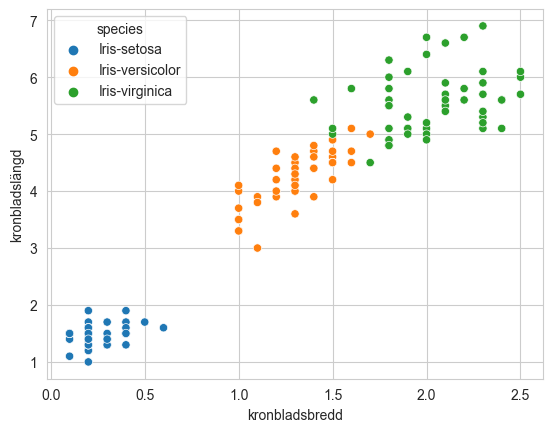

In [43]:
# Scatterplot 
sns.scatterplot(data=df, x="kronbladsbredd", y="kronbladslängd", hue="Blomtyp");
plt.legend(title='species');

In [44]:
df.head()

,bägarbladslängd,bägarbladsbredd,kronbladslängd,kronbladsbredd,Blomtyp
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<h3> Regression med OLS (Ordinary least squares) </h3>

In [45]:
from statsmodels.formula.api import ols

modell = ols('kronbladsbredd ~ kronbladslängd', data=df).fit()
print(modell.summary())

# Coef är intressant, våra koefficenter. b0, b1
# r-squared r2. Den kvadrareade korrelationskoefficenten.


                            OLS Regression Results                            
Dep. Variable:         kronbladsbredd   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1877.
Date:                Mon, 06 Feb 2023   Prob (F-statistic):           5.78e-86
Time:                        17:01:01   Log-Likelihood:                 24.400
No. Observations:                 150   AIC:                            -44.80
Df Residuals:                     148   BIC:                            -38.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.3665      0.040     -9.

# Vad säger denna informationen om datan? Jo, eftersom R-squared(koefficienten)

R-squared(koefficienten) är en sätt att mäta hur mycket totala variationen är och i detta fallet så är: R-squared = 0.927 vilket ger en stark korrelation pga värdet är nära 1.
F-statistic är övergripande signifikans av regressions modellen. Ett stort värde på F-Statistic indikerar att modellen passar bättre än medelvärde modellen, vilket typiskt ger medelvärdet för svaret.  

Så i detta exempel så är r-squared och adj r squared värdena nära 1. Vilket indikerar att modellen i en stor portion av variansen i svarsvariabeln.  

## Korrelation med scipy.stats

In [46]:
r,p=scs.pearsonr(df['kronbladsbredd'], df['kronbladslängd'])
print(r, p) # Ett positivt tal, ganska nära 1. r är korrelationskoefficenten. 

0.9627570970509661 5.776660988496418e-86


In [50]:
ypred = modell.predict(df['kronbladslängd'])
ypred

0      0.216473
1      0.216473
2      0.174831
3      0.258115
4      0.216473
         ...   
145    1.798865
146    1.715582
147    1.798865
148    1.882149
149    1.757224
Length: 150, dtype: float64

<h3> Obs! Vi undersöker hur datan ser ut också, vilket är viktigt när man gör en korrelations-analys. Här gör vi det ännu tydligare och se om det finns något korrelation och det skulle man ändå kunna säga att det gör.</h3>



### Vi kan se att det finns korrelation här mellan x och y på samtliga blomtyper

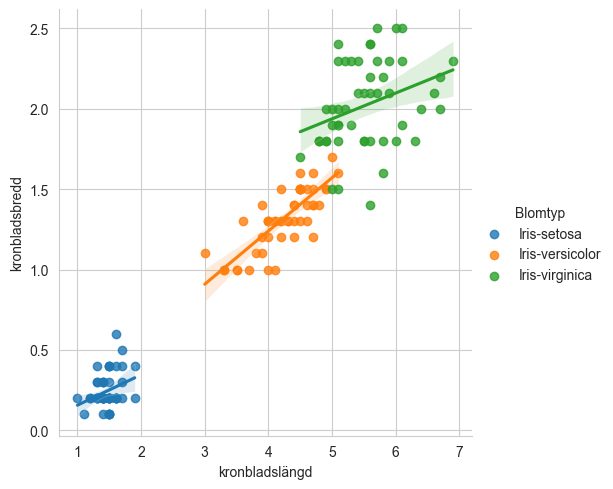

In [55]:
sns.lmplot(data=df, y='kronbladsbredd', x='kronbladslängd', hue='Blomtyp');

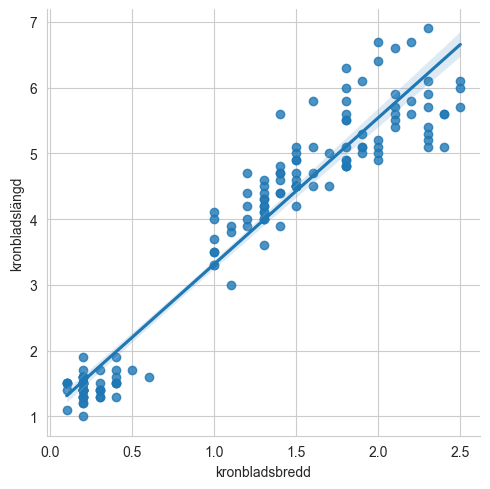

In [57]:
sns.lmplot(data=df, x='kronbladsbredd', y='kronbladslängd');

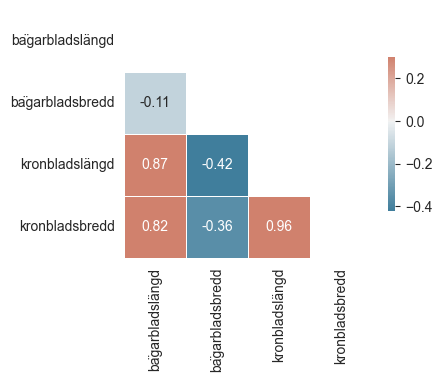

In [66]:
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool));

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(4, 4));

# Ger en customiserad skillnader färgmap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Visualiserar heatmapen och redigerad i rätt storlek.
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

## Så här kan vi alltså se att ju närmare 1 värdena är, desto mer korrelation finns det. I vårt exempel finns det alltså mycket korrelation mellan kronblaslängden och kronbladsbredden.